In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
stock_df = pd.read_csv('Official_Data.csv')
stock_df

,Time,Adj Closed Price,Monthly Return,Stock,Market Sector,Month,month,Quarter,Size,Year
0,01/01/2021,17.374220,0.000000,HAL,Energy,Jan,1,1,Big Cap,2021
1,01/04/2021,19.313990,-0.086751,HAL,Energy,Apr,4,2,Big Cap,2021
2,01/08/2021,19.768332,-0.033849,HAL,Energy,Aug,8,3,Big Cap,2021
3,01/12/2021,22.678337,0.059287,HAL,Energy,Dec,12,4,Big Cap,2021
4,01/01/2021,1835.739990,0.000000,GOOG,Communication Services,Jan,1,1,Mega Cap,2021
...,...,...,...,...,...,...,...,...,...,...
115,01/12/2017,284.992889,0.064160,LMT,Industrials,Dec,12,4,Big Cap,2017
116,01/01/2017,147.559998,0.000000,PANW,Information Technology,Jan,1,1,Big Cap,2017
117,01/04/2017,108.410004,-0.265316,PANW,Information Technology,Apr,4,2,Big Cap,2017
118,01/08/2017,132.690002,0.223965,PANW,Information Technology,Aug,8,3,Big Cap,2017


In [4]:
sns.set_style('dark')

[Text(0.5, 1.0, 'abc')]

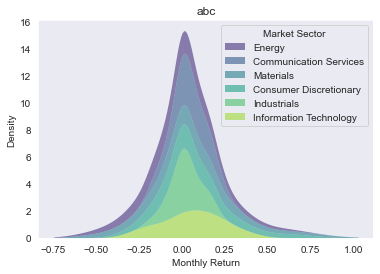

In [5]:
sns.kdeplot(data = stock_df, x ='Monthly Return',multiple = 'stack', hue = 'Market Sector',
            palette = 'viridis', alpha = .6, fill = True, common_norm = False, linewidth = 0).set(title = 'abc')

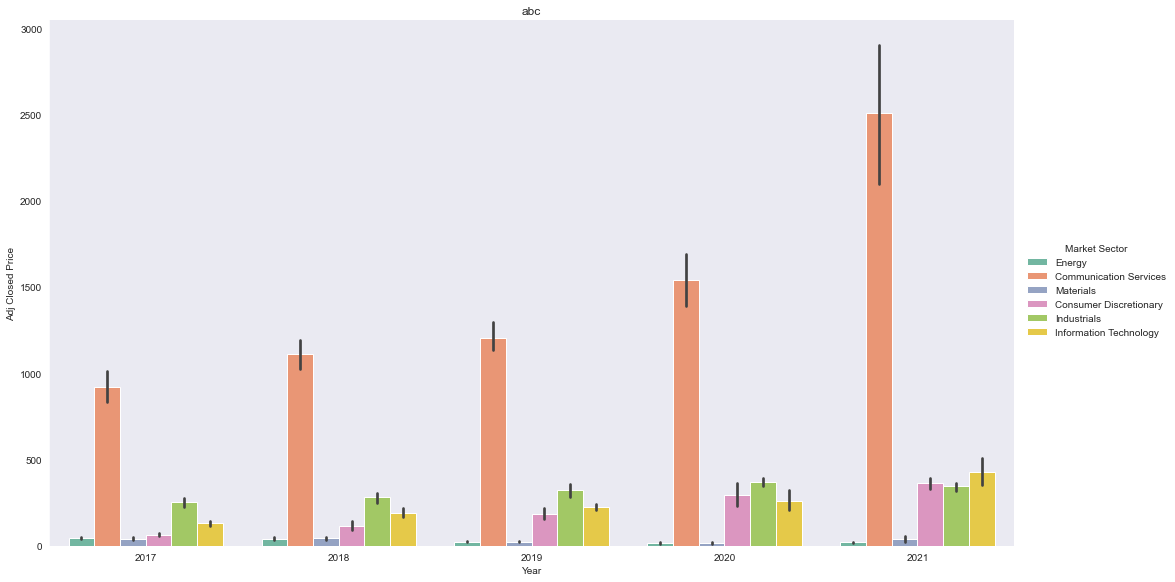

In [6]:
# Bar Plot

sns.catplot(data = stock_df, x = 'Year', y = 'Adj Closed Price',
            hue = 'Market Sector', palette = 'Set2', height = 8, aspect = 1.8, kind = 'bar').set(title = 'abc')

[Text(0.5, 1.0, 'TOTAL BILL COVERED BY SMOKER ON WEEKDAYS')]

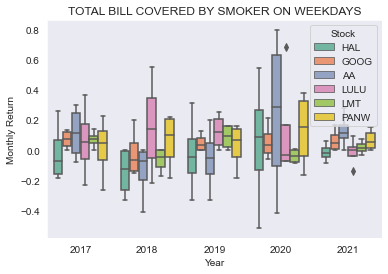

In [7]:
#Box Plot

sns.boxplot(data = stock_df, x = 'Year', y = 'Monthly Return', hue = 'Stock', 
            width = .8, palette = 'Set2').set(title = "TOTAL BILL COVERED BY SMOKER ON WEEKDAYS")

[Text(0.5, 1.0, 'abc')]

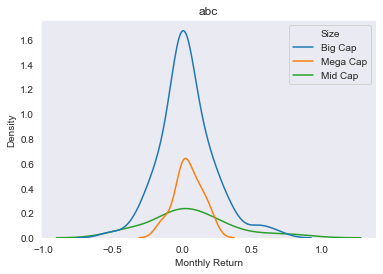

In [8]:
sns.kdeplot(data = stock_df, x ='Monthly Return', hue = 'Size', multiple = 'layer').set(title = 'abc')